# Python Machine Learning for Biology
# Dimensionality Reduction and Manifold Learning

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Principal Components Analysis

#### Load the cancer dataset

In [2]:
cancer = pd.read_csv('data/cancer.csv')

In [3]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Store features and response as variables

In [4]:
X = cancer.drop('diagnosis',  axis = 1)

In [5]:
y = cancer['diagnosis']

#### Before applying PCA, each features should be centered on zero with unit variance

In [6]:
X_std = StandardScaler().fit_transform(X)

#### Use PCA to find the first two principal components of the breast cancer dataset

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components = 2)

In [9]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_pca = pca.transform(X_std)

In [11]:
print(X.shape, X_pca.shape)

(569, 30) (569, 2)


In [12]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

#### Plot the PCA-transformed version of the breast cancer dataset

In [13]:
pca1 = X_pca[:, 0]
pca2 = X_pca[:, 1]

In [14]:
plt.scatter(pca1, pca2)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)')
plt.show()

<IPython.core.display.Javascript object>

#### Plot the magnitude of each feature value for the first two principal components

In [15]:
feature_names = list(X.columns)

In [16]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
plt.gca().set_xticks(np.arange(-.5, len(feature_names)))
plt.gca().set_yticks(np.arange(0.5, 2))
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12)
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12)
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                             pca.components_.max()], pad=0.65)
plt.show()

<IPython.core.display.Javascript object>

### Independent Work
Conduct a PCA on the iris dataset to reduce dimensions down to 2.

### Manifold Learning Methods

### Multidimensional scaling (MDS)

In [17]:
from sklearn.manifold import MDS

#### Make 'hello' data

In [18]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]


<IPython.core.display.Javascript object>


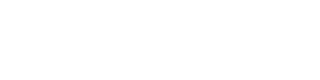

In [19]:
X = make_hello(1000)

In [20]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')
plt.show()

#### Get pairwise distances

In [21]:
from sklearn.metrics import pairwise_distances

In [22]:
D = pairwise_distances(X)
D.shape

(1000, 1000)

In [23]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()

#### MDS with 2 components

In [24]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)

In [25]:
out = model.fit_transform(D)

#### Plot MDS

In [26]:
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### Independent Work
Conduct an MDS on the cancer dataset (or another dataset of your choice)

### t-SNE

In [35]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.patheffects as PathEffects

#### Load the data

In [36]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [37]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

#### Take a look at the digits

<IPython.core.display.Javascript object>


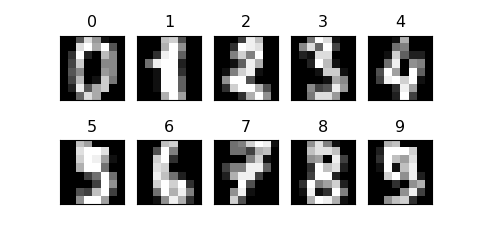

In [38]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
    plt.show()
plt.savefig('digits-generated.png', dpi=150)

#### Redorder the datapoints according to the handwritten numbers

In [31]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

#### Run the t-SNE algorithm on the dataset

In [39]:
digits_proj = TSNE().fit_transform(X)

#### Function to display transformed dataset

In [40]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

#### Plot

<IPython.core.display.Javascript object>


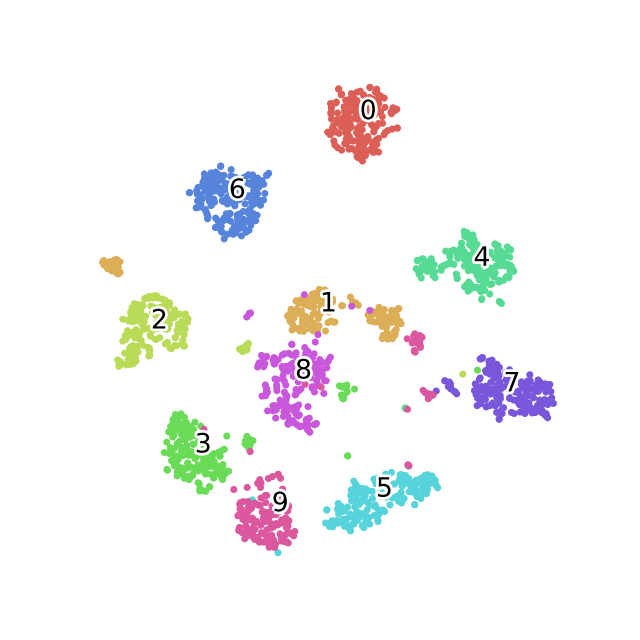

In [41]:
scatter(digits_proj, y)
plt.savefig('digits-tsne.png', dpi=150)